In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [5]:
df_transaction = pd.read_csv('data/train_transaction.csv')
df_identity = pd.read_csv('data/train_identity.csv')
df_new_train = pd.merge(df_transaction,df_identity,how='left',on='TransactionID')
"""test_transaction = pd.read_csv('data/test_transaction.csv')
test_identity = pd.read_csv('data/test_identity.csv')
df_new_test = pd.merge(test_transaction,test_identity,how='left',on='TransactionID')"""

"test_transaction = pd.read_csv('data/test_transaction.csv')\ntest_identity = pd.read_csv('data/test_identity.csv')\ndf_new_test = pd.merge(test_transaction,test_identity,how='left',on='TransactionID')"

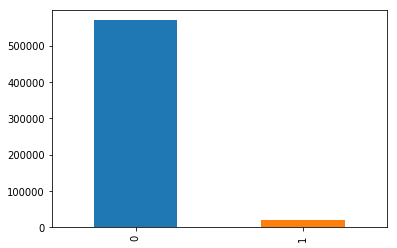

In [6]:
pd.value_counts(df_new_train['isFraud']).plot.bar()

In [7]:
def prepare_data(df):
    non_nulls = df.count()/df.shape[0]
    df = df[non_nulls[non_nulls > 0.8].index]
    df.drop(['TransactionID','TransactionDT'],axis=1,inplace=True)
    df.fillna(df.mean(),inplace=True)
    df.fillna(df.mode(),inplace=True)
    return df

In [8]:
train_data = prepare_data(df_new_train)
#test_data = prepare_data(df_new_test)

/home/akedia/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/akedia/.local/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/akedia/.local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
train_object = pd.get_dummies(train_data.select_dtypes(include='object'))
train_numeric = train_data.drop(train_data.select_dtypes(include='object'),axis=1)
train_encoded = pd.concat([train_numeric,train_object],axis=1)
train_labels = train_encoded['isFraud']
train_encoded.drop('isFraud',axis=1,inplace=True)

"""test_encoded = pd.get_dummies(test_data.select_dtypes(include='object'))
test_numeric = test_data.drop(test_encoded.select_dtypes(include='object'),axis=1)
test_encoded = pd.concat([test_numeric,test_encoded],axis=1)
test_encoded = le.transform(test_data.select_dtypes(include='object'))
test_labels = test_encoded['isFraud']
test_encoded.drop('isFraud',axis=1,inplace=True)"""

"test_encoded = pd.get_dummies(test_data.select_dtypes(include='object'))\ntest_numeric = test_data.drop(test_encoded.select_dtypes(include='object'),axis=1)\ntest_encoded = pd.concat([test_numeric,test_encoded],axis=1)\ntest_encoded = le.transform(test_data.select_dtypes(include='object'))\ntest_labels = test_encoded['isFraud']\ntest_encoded.drop('isFraud',axis=1,inplace=True)"

In [10]:
train_x,test_x,train_y,test_y = train_test_split(train_encoded,train_labels,test_size=0.2,random_state=42)

'''clf = LogisticRegression(random_state=0, solver='lbfgs').fit(train_x, train_y)
pred_clf = clf.predict(test_x)

gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)
predict_gbc = gbc.predict(test_x)'''

rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
predict_rfc = rfc.predict(test_x)
print(classification_report(predict_rfc,test_y))

/home/akedia/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    115964
           1       0.44      0.88      0.59      2144

   micro avg       0.98      0.98      0.98    118108
   macro avg       0.72      0.93      0.79    118108
weighted avg       0.99      0.98      0.98    118108

